In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [152]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [153]:
df = df[['Age','EstimatedSalary','Purchased']]
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [154]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [155]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [156]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [157]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

In [158]:
X_scaled[1:11]

array([[0.4047619 , 0.03703704],
       [0.19047619, 0.20740741],
       [0.21428571, 0.31111111],
       [0.02380952, 0.45185185],
       [0.21428571, 0.31851852],
       [0.21428571, 0.51111111],
       [0.33333333, 1.        ],
       [0.16666667, 0.13333333],
       [0.4047619 , 0.37037037],
       [0.19047619, 0.48148148]])

In [159]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [160]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [161]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

c:\Users\nasrullah\.conda\envs\tf_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [162]:
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

## **1. Batch Gradient Descent**

In [163]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [164]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])

In [165]:
%%time
history = model.fit(X_train,y_train,epochs=30,verbose=1,batch_size=400,validation_split=0.2)

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 923ms/step - accuracy: 0.3828 - loss: 11706.9316 - val_accuracy: 0.2500 - val_loss: 14072.8994
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.3828 - loss: 11032.9404 - val_accuracy: 0.2500 - val_loss: 13452.2148
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.3828 - loss: 10546.3223 - val_accuracy: 0.2500 - val_loss: 12934.0781
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.3828 - loss: 10140.1035 - val_accuracy: 0.2500 - val_loss: 12475.1885
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3828 - loss: 9780.3320 - val_accuracy: 0.2500 - val_loss: 12055.4502
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.3828 - loss: 9451.2568 - val_accuracy: 0.2500 - val_loss: 11663.6680
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.3828 - loss: 9144.0986 - val_accuracy: 0.2500 - val_loss: 11292.8672
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.3828 - l

[]

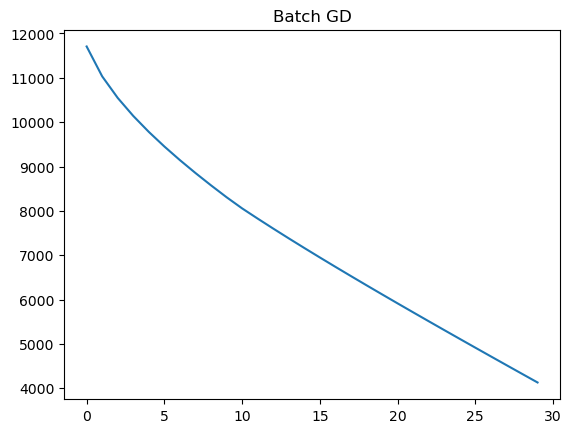

In [166]:
plt.plot(history.history['loss'])
plt.title("Batch GD")
plt.plot()

## **2. Stochastic Gradient Descent**

In [167]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

c:\Users\nasrullah\.conda\envs\tf_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [168]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])

In [169]:
%%time
history = model.fit(X_train,y_train,epochs=30,verbose=1,batch_size=1,validation_split=0.2)

Epoch 1/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4545 - loss: 178.5138 - val_accuracy: 0.2500 - val_loss: 290.4962
Epoch 2/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5486 - loss: 139.0647 - val_accuracy: 0.2500 - val_loss: 134.4727
Epoch 3/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5042 - loss: 139.9124 - val_accuracy: 0.2500 - val_loss: 397.7345
Epoch 4/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5169 - loss: 142.9584 - val_accuracy: 0.2500 - val_loss: 396.4299
Epoch 5/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4307 - loss: 167.3747 - val_accuracy: 0.2500 - val_loss: 46.5613
Epoch 6/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5968 - loss: 109.5323 - val_accuracy: 0.2500 - val_loss: 253.9342
Epoch 7/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4675 - loss: 146.0230 - val_accuracy: 0.7500 - val_loss: 108.2633
Epoch 8/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4582 - loss

[]

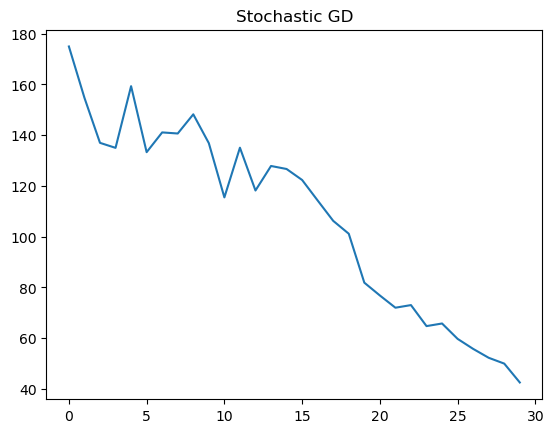

In [170]:
plt.plot(history.history['loss'])
plt.title("Stochastic GD")
plt.plot()

## **3. Mini Batch Gradient Descent**

In [171]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

c:\Users\nasrullah\.conda\envs\tf_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [172]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])

In [173]:
%%time
history = model.fit(X_train,y_train,epochs=30,verbose=1,batch_size=50,validation_split=0.2)

Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.5878 - loss: 1462.5754 - val_accuracy: 0.2500 - val_loss: 37.1372
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4286 - loss: 126.8593 - val_accuracy: 0.7500 - val_loss: 65.1265
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5248 - loss: 115.8361 - val_accuracy: 0.7500 - val_loss: 32.1495
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5629 - loss: 71.7308 - val_accuracy: 0.7500 - val_loss: 10.3831
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5332 - loss: 65.3303 - val_accuracy: 0.7500 - val_loss: 116.4090
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5723 - loss: 125.1921 - val_accuracy: 0.7500 - val_loss: 8.5785
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5526 - loss: 76.7314 - val_accuracy: 0.7500 - val_loss: 22.8416
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5919 - loss: 62.3035 - val_accuracy: 0.7500 - val_

[]

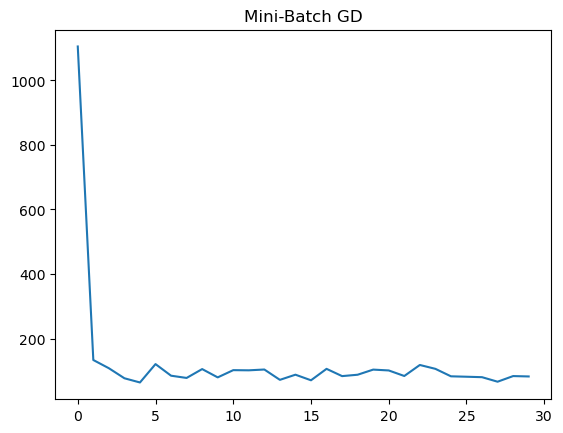

In [174]:
plt.plot(history.history['loss'])
plt.title("Mini-Batch GD")
plt.plot()